<a href="https://colab.research.google.com/github/Aman0307/speech_emotion/blob/main/speech2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=de8a64c45498e4ead9ff25578b4fe4cbc6d34a6e956717153a8500543a01df24
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
!pip install noisereduce

In [ ]:
#Install all the Reqiuired Libraries and Packages 
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import os, glob, pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().magic('matplotlib inline')
#All the Required Packages and Libraies are installed.
import soundfile
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
from keras.layers import Dropout,Dense,TimeDistributed
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amansingh0703","key":"5af96c02b6a72cd3e3ad5f1b6aa4a2ce"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 97% 417M/429M [00:02<00:00, 151MB/s]
100% 429M/429M [00:02<00:00, 188MB/s]


In [ ]:
!unzip ravdess-emotional-speech-audio.zip

Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03

In [ ]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8 MB 142 kB/s 


In [ ]:
!pip3 install pydub

In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (353 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155514 files

In [ ]:
## Python
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

In [ ]:
# Data Directory

dir_list = os.listdir("/content/audio_speech_actors_01-24")
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
# Create DataFrame for Data intel
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir("/content/audio_speech_actors_01-24" +'/'+ i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = "/content/audio_speech_actors_01-24" +'/'+ i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [ ]:
print (len(data_df))
data_df.head()

1440


,path,source,actor,gender,intensity,statement,repetition,emotion
0,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,0,0,4
1,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,1,1,0,2
2,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,1,1,0,8
3,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,0,1,2
4,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,1,1,3


In [ ]:
filename = data_df.path[1021]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

/content/audio_speech_actors_01-24/Actor_18/03-01-03-02-02-02-18.wav


(22050, array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.3903466e-08, -9.4329744e-09,  0.0000000e+00], dtype=float32))

In [ ]:
len(samples), sample_rate

(84610, 22050)

In [ ]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
sample_rate/ len(samples)

0.26060749320411297

Text(0.5, 0, 'Seconds')

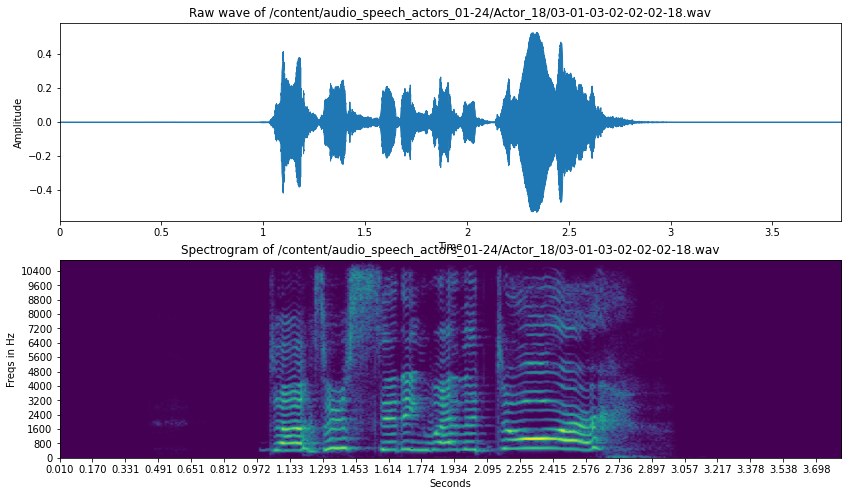

In [ ]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [ ]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([ 0.00232398,  0.0023195 ,  0.00237425, ..., -0.00765446,
        -0.00248635,  0.00027249], dtype=float32), array([22528, 60416]))

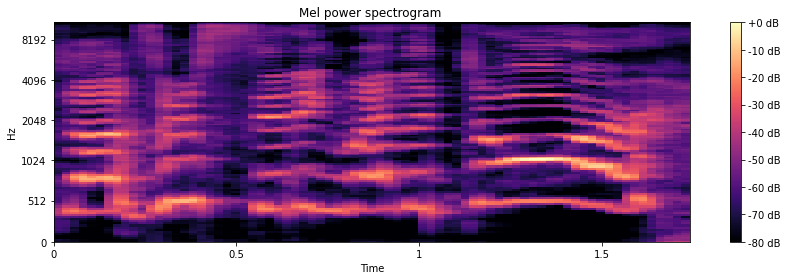

In [ ]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

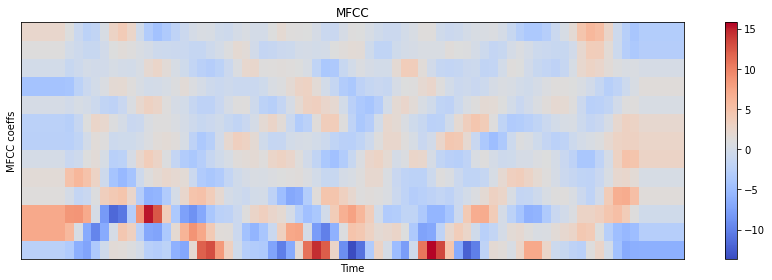

In [ ]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [ ]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by manuel trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

In [ ]:
# 2 class: Positive & Negative

# Positive: Calm, Happy
# Negative: Angry, Fearful, Sad

label2_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2: # Calm
        lb = "_positive"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
        
    # Add gender to the label    
    label2_list.append(data_df.gender[i] + lb)
    
len(label2_list)

1440

In [ ]:
#3 class: Positive, Neutral & Negative

# Positive:  Happy
# Negative: Angry, Fearful, Sad
# Neutral: Calm, Neutral

label3_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1: # Neutral
        lb = "_neutral"
    elif data_df.emotion[i] == 2: # Calm
        lb = "_neutral"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"
    
    # Add gender to the label  
    label3_list.append(data_df.gender[i] + lb)
    
len(label3_list)

1440

In [ ]:
# 5 class: angry, calm, sad, happy & fearful
label5_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"    
    else:
        lb = "_none"
    
    # Add gender to the label  
    label5_list.append(data_df.gender[i] + lb)
    
len(label5_list)

1440

In [ ]:
# All class

label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        
    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    
len(label8_list)

1440

In [ ]:
# Select the label 

data_df['label'] = label2_list

data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,0,0,4,male_negative
1,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,1,1,0,2,male_positive
2,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,1,1,0,8,male_none
3,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,0,1,2,male_positive
4,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,1,1,3,male_positive


In [ ]:
print (data_df.label.value_counts().keys())

Index(['male_negative', 'female_negative', 'male_none', 'female_none',
       'male_positive', 'female_positive'],
      dtype='object')


In [ ]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

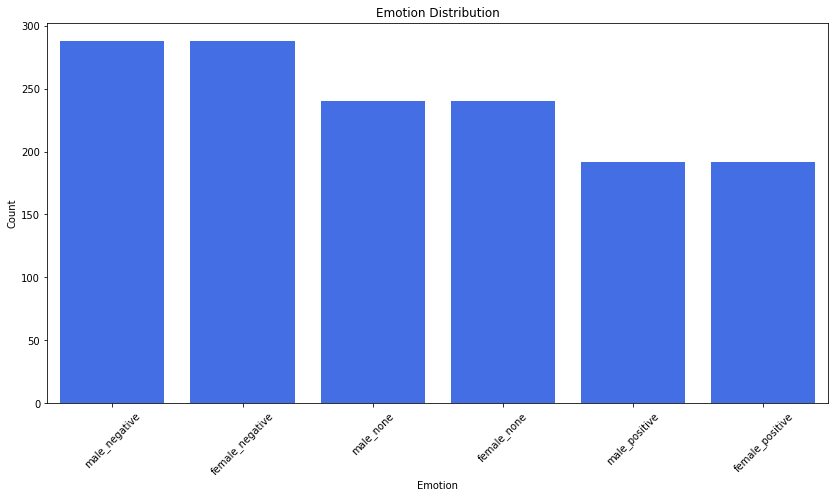

In [ ]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

In [ ]:
# Male Data Set


data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_happy"]
data2_df = data2_df[data2_df.label != "female_angry"]
data2_df = data2_df[data2_df.label != "female_sad"]
data2_df = data2_df[data2_df.label != "female_fearful"]
data2_df = data2_df[data2_df.label != "female_calm"]
data2_df = data2_df[data2_df.label != "female_positive"]
data2_df = data2_df[data2_df.label != "female_negative"].reset_index(drop=True)

tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head()

400


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,0,0,4,male_negative
1,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,1,1,0,2,male_positive
2,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,0,1,2,male_positive
3,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,0,1,1,3,male_positive
4,/content/audio_speech_actors_01-24/Actor_01/03...,1,1,male,1,0,0,5,male_negative


In [ ]:
print (len(data3_df))
data3_df.head()

80


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/audio_speech_actors_01-24/Actor_21/03...,1,21,male,0,0,1,4,male_negative
1,/content/audio_speech_actors_01-24/Actor_21/03...,1,21,male,1,0,1,6,male_negative
2,/content/audio_speech_actors_01-24/Actor_21/03...,1,21,male,0,0,1,5,male_negative
3,/content/audio_speech_actors_01-24/Actor_21/03...,1,21,male,0,1,0,3,male_positive
4,/content/audio_speech_actors_01-24/Actor_21/03...,1,21,male,1,0,0,5,male_negative


In [ ]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 400/400 [00:52<00:00,  7.61it/s]


In [ ]:
data.head()

,feature
0,"[-66.34822, -66.34822, -66.34822, -66.34822, -..."
1,"[-73.25497, -73.25497, -73.25497, -73.25497, -..."
2,"[-67.55739, -67.55739, -67.55739, -67.55739, -..."
3,"[-65.24335, -65.24335, -65.24335, -65.24335, -..."
4,"[-42.991745, -42.991745, -42.845966, -42.26785..."


In [ ]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [ ]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-62.797142,-65.721077,-66.348221,-66.348221,-66.348221,...,-65.956520,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221
1,-73.254967,-73.254967,-73.254967,-73.254967,-68.774429,-69.380402,-73.254967,-73.254967,-73.254967,-73.254967,...,-50.502068,-50.884087,-55.666733,-54.600002,-53.439114,-56.300125,-57.458267,-58.767071,-59.836510,-58.409870
2,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388
3,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-60.038185,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.051971,-64.284286
4,-42.991745,-42.991745,-42.845966,-42.267849,-40.690147,-40.163383,-40.072178,-42.603901,-41.733139,-41.410767,...,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745


In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

400

In [ ]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-62.797142,-65.721077,-66.348221,-66.348221,-66.348221,...,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,male_negative
1,-73.254967,-73.254967,-73.254967,-73.254967,-68.774429,-69.380402,-73.254967,-73.254967,-73.254967,-73.254967,...,-50.884087,-55.666733,-54.600002,-53.439114,-56.300125,-57.458267,-58.767071,-59.836510,-58.409870,male_positive
2,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388,male_positive
3,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.051971,-64.284286,male_positive
4,-42.991745,-42.991745,-42.845966,-42.267849,-40.690147,-40.163383,-40.072178,-42.603901,-41.733139,-41.410767,...,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,male_negative
5,-70.746513,-70.746513,-70.025284,-69.131271,-70.746513,-70.746513,-70.746513,-70.746513,-70.746513,-70.746513,...,-70.746513,-70.746513,-70.079247,-69.590454,-69.202751,-70.159462,-70.445366,-68.199043,-67.414200,male_positive
6,-35.372726,-36.900326,-38.971123,-38.443581,-37.651356,-38.045132,-38.624809,-42.541157,-43.463234,-43.102680,...,-44.527992,-45.828773,-47.234535,-47.322300,-46.968773,-47.675339,-48.195766,-47.573978,-48.545269,male_negative
7,-58.731003,-58.746517,-58.048584,-57.370796,-58.199924,-59.706638,-59.876179,-59.998066,-59.936649,-60.248569,...,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,-60.248569,male_positive
8,-55.663086,-56.170334,-56.157845,-54.663475,-55.166775,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,...,-56.156944,-56.156944,-56.156944,-55.557552,-54.967793,-56.156944,-56.156944,-54.898689,-55.319336,male_negative
9,-65.427315,-65.427315,-65.261780,-65.427315,-65.427315,-65.427315,-65.027588,-65.404327,-65.427315,-58.999031,...,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,-65.427315,male_positive


In [ ]:
rnewdf.isnull().sum().sum()

2284

In [ ]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-62.797142,-65.721077,-66.348221,-66.348221,-66.348221,...,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,male_negative
1,-73.254967,-73.254967,-73.254967,-73.254967,-68.774429,-69.380402,-73.254967,-73.254967,-73.254967,-73.254967,...,-50.884087,-55.666733,-54.600002,-53.439114,-56.300125,-57.458267,-58.767071,-59.836510,-58.409870,male_positive
2,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388,male_positive
3,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.051971,-64.284286,male_positive
4,-42.991745,-42.991745,-42.845966,-42.267849,-40.690147,-40.163383,-40.072178,-42.603901,-41.733139,-41.410767,...,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,male_negative


In [ ]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

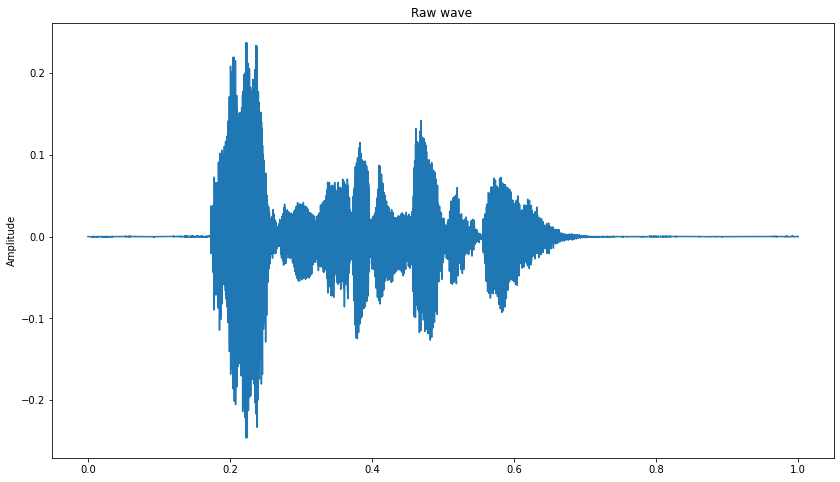

In [ ]:
X, sample_rate = librosa.load(data2_df.path[216], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

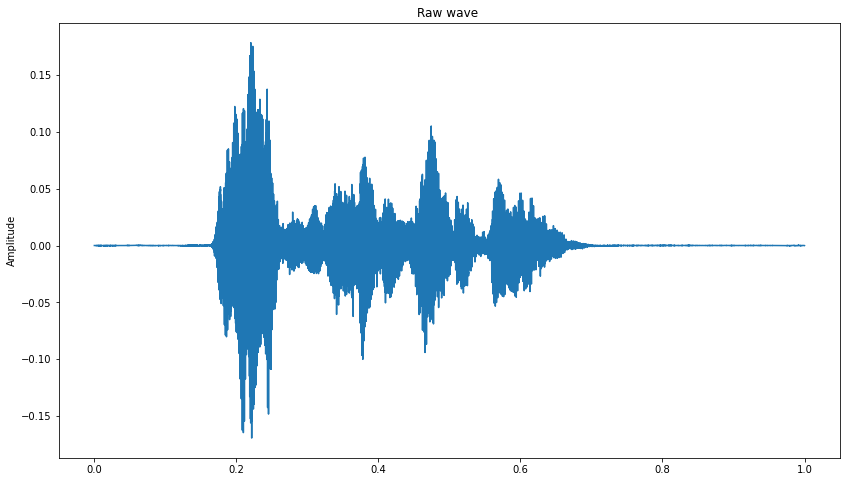

In [ ]:
x = pitch(X, sample_rate)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)

In [ ]:
# Augmentation Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 400/400 [00:38<00:00, 10.27it/s]


In [ ]:
len(syn_data1)

400

In [ ]:
syn_data1 = syn_data1.reset_index(drop=True)

In [ ]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

400

In [ ]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-54.966267,-52.224148,-51.488998,-53.681466,-54.251905,-52.891714,-51.531170,-50.194802,-51.046257,-52.119232,...,-51.592073,-52.139769,-51.708549,-51.482834,-52.809090,-51.710975,-50.416405,-50.138205,-51.778964,male_negative
1,-54.596464,-57.042182,-60.011662,-56.448680,-56.831247,-58.717565,-57.241711,-57.446885,-57.576821,-55.924530,...,-47.705967,-53.438786,-52.016537,-49.726101,-52.837628,-55.798201,-55.093034,-54.326591,-54.582745,male_positive
2,-57.485998,-54.749788,-53.755523,-54.963736,-56.816177,-54.459113,-53.755112,-53.612815,-54.636589,-53.452551,...,-53.803021,-53.836388,-54.889856,-55.745207,-54.874804,-54.967645,-55.051627,-54.686206,-53.342830,male_positive
3,-63.366512,-63.373261,-62.351809,-62.392996,-63.067841,-61.611561,-62.596889,-63.828095,-64.332993,-62.540750,...,-60.457487,-59.868180,-61.004050,-59.385428,-59.219399,-59.846741,-61.851629,-61.359376,-60.590617,male_positive
4,-40.019350,-39.404778,-39.352611,-38.243350,-38.227578,-38.199402,-37.404882,-39.532213,-38.845130,-38.006071,...,-39.186632,-39.458493,-40.805455,-40.145245,-37.781580,-37.936070,-39.095576,-39.298481,-40.521787,male_negative


In [ ]:
combined_df = pd.concat([rnewdf, syndf1], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-62.797142,-65.721077,-66.348221,-66.348221,-66.348221,...,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,male_negative
1,-73.254967,-73.254967,-73.254967,-73.254967,-68.774429,-69.380402,-73.254967,-73.254967,-73.254967,-73.254967,...,-50.884087,-55.666733,-54.600002,-53.439114,-56.300125,-57.458267,-58.767071,-59.836510,-58.409870,male_positive
2,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-65.239815,-65.536194,-67.557388,-67.557388,...,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.557388,-67.126572,-67.557388,male_positive
3,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.243347,-65.117577,...,-62.578308,-61.972858,-62.992752,-63.596188,-60.900845,-60.145267,-63.739048,-64.051971,-64.284286,male_positive
4,-42.991745,-42.991745,-42.845966,-42.267849,-40.690147,-40.163383,-40.072178,-42.603901,-41.733139,-41.410767,...,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,-42.991745,male_negative


In [ ]:
#  Stratified Shuffle Split
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train.value_counts()

male_negative    384
male_positive    256
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

male_negative    96
male_positive    64
Name: label, dtype: int64

In [ ]:
X_train.isna().sum().sum()

0

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
X_train.shape

(640, 259)

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
# Set up Keras util functions

In [ ]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0.0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [ ]:
# New model
import tensorflow
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(2))
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
# Plotting Model Summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 259, 256)          2304      
                                                                 
 activation_27 (Activation)  (None, 259, 256)          0         
                                                                 
 conv1d_25 (Conv1D)          (None, 259, 256)          524544    
                                                                 
 batch_normalization_6 (Batc  (None, 259, 256)         1024      
 hNormalization)                                                 
                                                                 
 activation_28 (Activation)  (None, 259, 256)          0         
                                                                 
 dropout_6 (Dropout)         (None, 259, 256)          0         
                                                      

In [ ]:
# Compile your model

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])

In [ ]:
# Model Training

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('model/aug_noiseNshift_2class2_np.h5', save_best_only=True, monitor='val_loss', mode='min')

cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=5,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/5
40/40 [==============================] - 19s 421ms/step - loss: 0.7760 - accuracy: 0.4828 - fscore: 0.4828 - val_loss: 0.7125 - val_accuracy: 0.4000 - val_fscore: 0.4000 - lr: 1.0000e-04
Epoch 2/5
40/40 [==============================] - 16s 408ms/step - loss: 0.6543 - accuracy: 0.6266 - fscore: 0.6266 - val_loss: 0.6965 - val_accuracy: 0.4938 - val_fscore: 0.4937 - lr: 1.0000e-04
Epoch 3/5
40/40 [==============================] - 17s 422ms/step - loss: 0.6367 - accuracy: 0.6250 - fscore: 0.6250 - val_loss: 0.6869 - val_accuracy: 0.5562 - val_fscore: 0.5562 - lr: 1.0000e-04
Epoch 4/5
40/40 [==============================] - 18s 445ms/step - loss: 0.6248 - accuracy: 0.6406 - fscore: 0.6406 - val_loss: 0.6779 - val_accuracy: 0.6062 - val_fscore: 0.6062 - lr: 1.0000e-04
Epoch 5/5
40/40 [==============================] - 17s 437ms/step - loss: 0.6237 - accuracy: 0.6266 - fscore: 0.6266 - val_loss: 0.6653 - val_accuracy: 0.6500 - val_fscore: 0.6500 - lr: 1.0000e-04


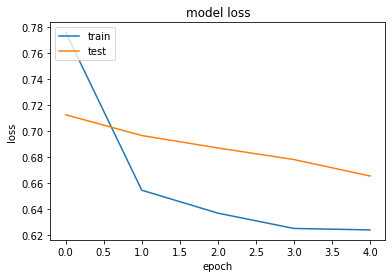

In [ ]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Saving the model.json

import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model/aug_noiseNshift_2class2_np.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 65.00%


Predicting emotions on test data

In [ ]:
len(data3_df)

80

In [ ]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data3_df))):
    X, sample_rate = librosa.load(data3_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]
    
test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data3_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|██████████| 80/80 [00:06<00:00, 12.06it/s]


In [ ]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

5/5 [==============================] - 1s 93ms/step


In [ ]:
preds

array([[0.5327829 , 0.46721706],
       [0.50094455, 0.4990554 ],
       [0.54017925, 0.4598207 ],
       [0.5215665 , 0.47843352],
       [0.5462592 , 0.45374078],
       [0.54893327, 0.45106676],
       [0.47494772, 0.5250522 ],
       [0.5034226 , 0.49657735],
       [0.49352843, 0.5064715 ],
       [0.51881975, 0.48118022],
       [0.5125275 , 0.48747241],
       [0.4932133 , 0.50678676],
       [0.5563846 , 0.4436153 ],
       [0.50234586, 0.49765414],
       [0.5375229 , 0.4624771 ],
       [0.5163096 , 0.48369035],
       [0.56063455, 0.43936545],
       [0.5219268 , 0.47807324],
       [0.5046292 , 0.4953708 ],
       [0.55878156, 0.44121835],
       [0.5202499 , 0.47975013],
       [0.4936382 , 0.50636184],
       [0.45152363, 0.54847634],
       [0.4855132 , 0.5144868 ],
       [0.4915566 , 0.50844336],
       [0.53683364, 0.46316636],
       [0.4953588 , 0.5046412 ],
       [0.51120317, 0.48879677],
       [0.5075383 , 0.49246168],
       [0.47521582, 0.5247841 ],
       [0.

In [ ]:
abc = preds.astype(int).flatten()

In [ ]:
print(abc)

[                   0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                   

In [ ]:
predictions = (lb.inverse_transform((abc)))

ValueError: ignored

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

In [ ]:
actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

In [ ]:
finaldf = actualdf.join(preddf)

Actual vs Predicted

In [ ]:
finaldf[20:40]

In [ ]:
finaldf.groupby('actualvalues').count()

In [ ]:
finaldf.groupby('predictedvalues').count()

In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

In [ ]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

In [ ]:
# Visualize Confusion Matrix 

class_names = ['male_negative', 'male_positive']
# class_names = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad', 'male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']


print_confusion_matrix(c, class_names)